Представьте себя ненадолго разработчиком компьютерной игры в стиле фэнтези. Вам поручено написать реализацию системы эффектов, которые могут быть наложены на героя вашей игры.  

В игре есть герой, который обладает некоторым набором характеристик. Класс героя описан следующим образом:

In [1]:
class Hero:
    def __init__(self):
        self.positive_effects = []
        self.negative_effects = []
        self.stats = {
            "HP": 128,  # health points
            "MP": 42,  # magic points, 
            "SP": 100,  # skill points
            "Strength": 15,  # сила
            "Perception": 4,  # восприятие
            "Endurance": 8,  # выносливость
            "Charisma": 2,  # харизма
            "Intelligence": 3,  # интеллект
            "Agility": 8,  # ловкость 
            "Luck": 1  # удача
        }

    def get_positive_effects(self):
        return self.positive_effects.copy()

    def get_negative_effects(self):
        return self.negative_effects.copy()

    def get_stats(self):
        return self.stats.copy()

К основным характеристикам относятся: Сила (Strength), Восприятие (Perception), Выносливость (Endurance), Харизма (Charisma), Интеллект (Intelligence), Ловкость (Agility), Удача (Luck).  

Враги и союзники могут накладывать на героя положительные и отрицательные эффекты. Эти эффекты изменяют характеристики героя,  увеличивая или уменьшая значения определенных характеристик, в зависимости от того какие эффекты были наложены.  На героя можно накладывать бесконечно много эффектов, действие одинаковых эффектов суммируется. Игрок должен знать, какие положительные и какие отрицательные эффекты на него были наложены и в каком порядке. Названия эффектов совпадают с названиями классов.  

За получение данных о текущем состоянии героя отвечают методы get_stats, get_positive_effects,  get_negative_effects.  

Вам необходимо написать систему декораторов, представленную на UML-диаграмме:

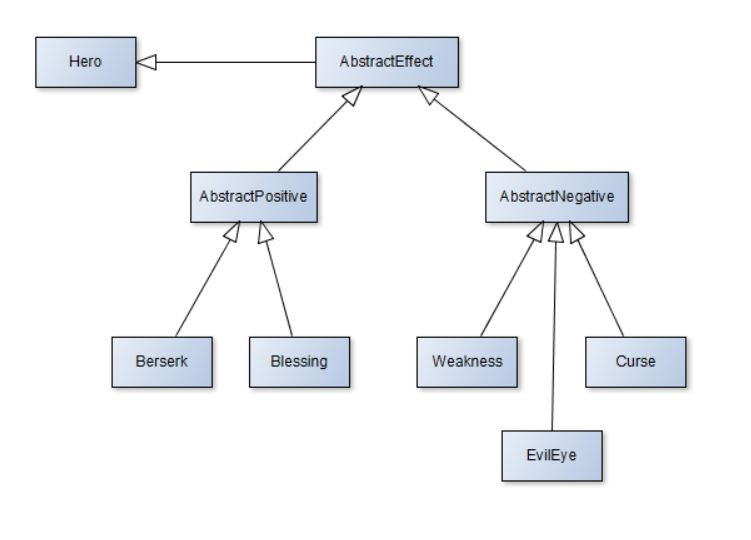

In [2]:
from abc import ABC, abstractmethod

In [3]:
from abc import ABC, abstractmethod

class AbstractEffect(ABC, Hero):
    """Абстрактный класс для всех эффектов"""
    
    def __init__(self, base):
        self.base = base
    
    @abstractmethod
    def get_positive_effects(self):
        pass
        
    @abstractmethod
    def get_positive_effects(self):
        pass 
    
    @abstractmethod
    def get_stats(self):
        pass
    
    
class AbstractPositive(AbstractEffect):
    """Абстрактный класс для положительных эффектов"""

    # чтобы не объявлять отрицательные эффекты во всех положит. классах
    def get_negative_effects(self):
        return self.base.get_negative_effects()
    
    
class AbstractNegative(AbstractEffect):
    """Абстрактный класс для отрицательных эффектов"""
    
    # чтобы не объявлять положительные эффекты во всех отрицат. классах
    def get_positive_effects(self):
        return self.base.get_positive_effects()


class Berserk(AbstractPositive):
    """Сила +7, Выносливость +7, Ловкость +7, Удача +7
       Восприятие -3, Харизма -3, Интеллект -3,
       Здоровье +50"""
    
    def get_positive_effects(self):
        name = "Berserk"
        return self.base.get_positive_effects() + [name]

    def get_stats(self):
        stats = self.base.get_stats()
        stats["Strength"] += 7
        stats["Endurance"] += 7
        stats["Agility"] += 7
        stats["Luck"] += 7
        stats["Perception"] -= 3
        stats["Charisma"] -= 3
        stats["Intelligence"] -= 3
        stats["HP"] += 50
        return stats

    
class Blessing(AbstractPositive):
    """Все основные характеристики +2"""
        
    def get_positive_effects(self):
        name = "Blessing"
        return self.base.get_positive_effects() + [name]
    
    def get_stats(self):
        self.stats = self.base.get_stats()
        stats["Strength"] += 2
        stats["Endurance"] += 2
        stats["Agility"] += 2
        stats["Luck"] += 2
        stats["Perception"] += 2
        stats["Charisma"] += 2
        stats["Intelligence"] += 2
        return stats


class Weakness(AbstractNegative):
    """Сила -4, Выносливость -4, Ловкость -4"""
    
    def get_negative_effects(self):
        name = "Weakness"
        return self.base.get_negative_effects() + [name]
    
    def get_stats(self):        
        stats = self.base.get_stats()
        stats["Strength"] -= 4
        stats["Endurance"] -= 4
        stats["Agility"] -= 4
        return stats
    

class EvilEye(AbstractNegative):
    """Удача -10"""
    
    def get_negative_effects(self):
        name = "EvilEye"
        return self.base.get_negative_effects() + [name]
    
    def get_stats(self):
        stats = self.base.get_stats()
        stats["Luck"] -= 10
        return stats
    
    
class Curse(AbstractNegative):
    """Все основные характеристики -2"""
        
    def get_negative_effects(self):
        name = "Curse"
        return self.base.get_negative_effects() + [name]
    
    def get_stats(self):
        stats = self.base.get_stats()
        stats["Strength"] -= 2
        stats["Endurance"] -= 2
        stats["Agility"] -= 2
        stats["Luck"] -= 2
        stats["Perception"] -= 2
        stats["Charisma"] -= 2
        stats["Intelligence"] -= 2
        return stats

Примеры работы:

In [4]:
hero = Hero()

In [5]:
e1 = EvilEye(hero)
e2 = EvilEye(e1)
e3 = EvilEye(e2)
e4 = EvilEye(e3)

In [6]:
e3.base = e1

In [7]:
e4.get_negative_effects()

['EvilEye', 'EvilEye', 'EvilEye']

In [8]:
e4.get_stats()

{'HP': 128,
 'MP': 42,
 'SP': 100,
 'Strength': 15,
 'Perception': 4,
 'Endurance': 8,
 'Charisma': 2,
 'Intelligence': 3,
 'Agility': 8,
 'Luck': -29}

In [9]:
q1 = Blessing(hero)
q2 = Berserk(q1)
q3 = Blessing(q2)

In [10]:
q3.base = q1
q3.get_positive_effects()

['Blessing', 'Blessing']

In [11]:
q4 = Berserk(q3)

In [12]:
q4.get_positive_effects()

['Blessing', 'Blessing', 'Berserk']